In [15]:
#Import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
from nltk.corpus import stopwords
from textblob import Word

In [2]:
#File path
file = "Africa\Africa_1997-2020_Jan08.csv"

In [3]:
#Read the csv file into a panda Dataframe
africa_conflict = pd.read_csv(file, sep=';')

In [146]:
africa_conflict.head()

,ISO,EVENT_ID_CNTY,EVENT_ID_NO_CNTY,EVENT_DATE,YEAR,TIME_PRECISION,EVENT_TYPE,SUB_EVENT_TYPE,ACTOR1,ASSOC_ACTOR_1,...,ADMIN3,LOCATION,LATITUDE,LONGITUDE,GEO_PRECISION,SOURCE,SOURCE_SCALE,NOTES,FATALITIES,TIMESTAMP
0,12,ALG1,1,01-janvier-1997,1997,1,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,...,NaN,Douaouda,36672,2789,1,Algeria Watch,Other,5 January: Beheading of 5 citizens in Douaouda...,5,1582579226
1,12,ALG2,2,02-janvier-1997,1997,1,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,...,NaN,Hassasna,36133,883,1,Algeria Watch,Other,Two citizens were beheaded in Hassasna.,2,1582579226
2,12,ALG3,3,03-janvier-1997,1997,1,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,...,NaN,Hassi El Abed,34966,"-0,29",1,Algeria Watch,Other,Two citizens were killed in a raid on the vill...,2,1582579226
3,12,ALG4,4,04-janvier-1997,1997,1,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,...,NaN,Blida,36469,2829,1,Algeria Watch,Other,4 January: 16 citizens were murdered in the vi...,16,1582579226
4,12,ALG5,5,05-janvier-1997,1997,1,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,...,NaN,Douaouda,36672,2789,1,Algeria Watch,Other,5 January: Killing of 18 citizens in the Olivi...,18,1582579226


In [147]:
africa_conflict.tail()

,ISO,EVENT_ID_CNTY,EVENT_ID_NO_CNTY,EVENT_DATE,YEAR,TIME_PRECISION,EVENT_TYPE,SUB_EVENT_TYPE,ACTOR1,ASSOC_ACTOR_1,...,ADMIN3,LOCATION,LATITUDE,LONGITUDE,GEO_PRECISION,SOURCE,SOURCE_SCALE,NOTES,FATALITIES,TIMESTAMP
65530,404,KEN318,318,25-octobre-1998,1998,1,Violence against civilians,Attack,OLF: Oromo Liberation Front,Borana Ethnic Militia (Kenya),...,Township,Tuli,1643,40343,1,All Africa,Regional,OLF and Borana ethnic militia attack civilians...,28,1553544833
65531,404,KEN319,319,02-novembre-1998,1998,1,Protests,Peaceful protest,Protesters (Kenya),Students (Kenya),...,Nairobi Central,Nairobi,-1283,36817,1,All Africa,Regional,University students protest over killing in Wa...,0,1567465412
65532,404,KEN320,320,10-novembre-1998,1998,1,Battles,Armed clash,SPLM/A: Sudan People's Liberation Movement/Army,NaN,...,Nairobi Central,Nairobi,-1283,36817,1,All Africa,Regional,Garangs SPLA security men raid home of Kerubin...,0,1604344065
65533,404,KEN323,323,14-novembre-1998,1998,1,Battles,Armed clash,SPLM/A: Sudan People's Liberation Movement/Army,NaN,...,Nairobi Central,Nairobi,-1283,36817,1,All Africa,Regional,Rival SPLA factions battle at police station,0,1583194169
65534,404,KEN322,322,14-novembre-1998,1998,1,Battles,Armed clash,SPLM/A: Sudan People's Liberation Movement/Army,NaN,...,Nairobi Central,Nairobi,-1283,36817,1,All Africa,Regional,Gang of youth loyal to Kerubinos SPLA faction ...,0,1583194169


In [6]:
africa_conflict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ISO               65535 non-null  int64 
 1   EVENT_ID_CNTY     65535 non-null  object
 2   EVENT_ID_NO_CNTY  65535 non-null  int64 
 3   EVENT_DATE        65535 non-null  object
 4   YEAR              65535 non-null  int64 
 5   TIME_PRECISION    65535 non-null  int64 
 6   EVENT_TYPE        65535 non-null  object
 7   SUB_EVENT_TYPE    65535 non-null  object
 8   ACTOR1            65535 non-null  object
 9   ASSOC_ACTOR_1     12768 non-null  object
 10  INTER1            65535 non-null  int64 
 11  ACTOR2            50346 non-null  object
 12  ASSOC_ACTOR_2     11167 non-null  object
 13  INTER2            65535 non-null  int64 
 14  INTERACTION       65535 non-null  int64 
 15  REGION            65535 non-null  object
 16  COUNTRY           65535 non-null  object
 17  ADMIN1      

In [7]:
#We have 29 columns and 65k+ rows
#Understanding the column meanings will give us insight on which columns are useless for our conflict analysis.
#ISO is A numeric code for each individual country. Might be useless since COUNTRY exists.
#EVENT_ID_CNTY is An individual identifier by number and country acronym (updated annually). Useless since COUNTRY exists.
#EVENT_ID_NO_CNTY is individual numeric identifier (updated annually). It seems to be extracted from the EVENT_ID_CNTY. Useless.
#YEAR. It might be useful for initial analysis but will be useless on Power BI since EVENT_DATE exists.
#TIME_PRECISION, GEO_PRECISION, TIMESTAMP. These could be useful but not necessary.
#INTER_1, INTER_2 and INTERACTION columns were not clear so I'll probably remove those as well
#1. event_date: The day,month and year on which an event took place.
#2. event_type: The type of event.
#3. sub_event_type: The type of sub event of event.
#4. actor1: The named actor involved in the event.
#5. actor2: The named actor involved in the event.
#6. interaction: A numeric code indicating the interaction between types of ACTOR1 and ACTOR2.
#7. region: The region of the world where the event took place.
#8. admin1: The largest sub-national administrative region in which the event took place.
#10. admin2: The second largest sub-national administrative region in which the event took place
#11. admin3: The third largest sub-national administrative region in which the event took place.
#12. location: The location in which the event took place.
#13. latitude: The latitude of the location.
#14. longitude: The longitude of the location
#15. source: The source of the event report.
#16. source_scale: The scale (local, regional, national, international) of the source
#17. notes:A short description of the event
#18. fatalities:The number of reported fatalities which occurred during the event

In [148]:
#Which columns have empty values
#africa_conflict.apply(lambda x: sum(x.isnull()))
africa_conflict.isnull().sum()[africa_conflict.isnull().sum()>0]

ASSOC_ACTOR_1    52767
ACTOR2           15189
ASSOC_ACTOR_2    54368
ADMIN3           13204
NOTES             2604
dtype: int64

In [4]:
#Let's drop the columns based on low level of importance and high N/A count.
africa_conflict.drop(columns=['ASSOC_ACTOR_1', 'ASSOC_ACTOR_2', 'ADMIN3','TIME_PRECISION', 'GEO_PRECISION', 'TIMESTAMP',
                     'EVENT_ID_NO_CNTY', 'EVENT_ID_CNTY', 'ISO', 'INTER1', 'INTER2', 'INTERACTION'], inplace=True)

In [151]:
africa_conflict.head()

,EVENT_DATE,YEAR,EVENT_TYPE,SUB_EVENT_TYPE,ACTOR1,ACTOR2,REGION,COUNTRY,ADMIN1,ADMIN2,LOCATION,LATITUDE,LONGITUDE,SOURCE,SOURCE_SCALE,NOTES,FATALITIES
0,01-janvier-1997,1997,Violence against civilians,Attack,GIA: Armed Islamic Group,Civilians (Algeria),Northern Africa,Algeria,Tipaza,Douaouda,Douaouda,36672,2789,Algeria Watch,Other,5 January: Beheading of 5 citizens in Douaouda...,5
1,02-janvier-1997,1997,Violence against civilians,Attack,GIA: Armed Islamic Group,Civilians (Algeria),Northern Africa,Algeria,Relizane,Mazouna,Hassasna,36133,883,Algeria Watch,Other,Two citizens were beheaded in Hassasna.,2
2,03-janvier-1997,1997,Violence against civilians,Attack,GIA: Armed Islamic Group,Civilians (Algeria),Northern Africa,Algeria,Saida,Youb,Hassi El Abed,34966,"-0,29",Algeria Watch,Other,Two citizens were killed in a raid on the vill...,2
3,04-janvier-1997,1997,Violence against civilians,Attack,GIA: Armed Islamic Group,Civilians (Algeria),Northern Africa,Algeria,Blida,Blida,Blida,36469,2829,Algeria Watch,Other,4 January: 16 citizens were murdered in the vi...,16
4,05-janvier-1997,1997,Violence against civilians,Attack,GIA: Armed Islamic Group,Civilians (Algeria),Northern Africa,Algeria,Tipaza,Douaouda,Douaouda,36672,2789,Algeria Watch,Other,5 January: Killing of 18 citizens in the Olivi...,18


In [153]:
africa_conflict.tail()

,EVENT_DATE,YEAR,EVENT_TYPE,SUB_EVENT_TYPE,ACTOR1,ACTOR2,REGION,COUNTRY,ADMIN1,ADMIN2,LOCATION,LATITUDE,LONGITUDE,SOURCE,SOURCE_SCALE,NOTES,FATALITIES
65530,25-octobre-1998,1998,Violence against civilians,Attack,OLF: Oromo Liberation Front,Civilians (Kenya),Eastern Africa,Kenya,Wajir,Wajir East,Tuli,1643,40343,All Africa,Regional,OLF and Borana ethnic militia attack civilians...,28
65531,02-novembre-1998,1998,Protests,Peaceful protest,Protesters (Kenya),NaN,Eastern Africa,Kenya,Nairobi,Starehe,Nairobi,-1283,36817,All Africa,Regional,University students protest over killing in Wa...,0
65532,10-novembre-1998,1998,Battles,Armed clash,SPLM/A: Sudan People's Liberation Movement/Army,SPLM/A-Kerubino: Sudan People's Liberation Mov...,Eastern Africa,Kenya,Nairobi,Starehe,Nairobi,-1283,36817,All Africa,Regional,Garangs SPLA security men raid home of Kerubin...,0
65533,14-novembre-1998,1998,Battles,Armed clash,SPLM/A: Sudan People's Liberation Movement/Army,SPLM/A-Kerubino: Sudan People's Liberation Mov...,Eastern Africa,Kenya,Nairobi,Starehe,Nairobi,-1283,36817,All Africa,Regional,Rival SPLA factions battle at police station,0
65534,14-novembre-1998,1998,Battles,Armed clash,SPLM/A: Sudan People's Liberation Movement/Army,SPLM/A-Kerubino: Sudan People's Liberation Mov...,Eastern Africa,Kenya,Nairobi,Starehe,Nairobi,-1283,36817,All Africa,Regional,Gang of youth loyal to Kerubinos SPLA faction ...,0


In [5]:
#Latitude and longitude are not correct. We need to correct that for better analysis.
#First the numbers with commas will be replaced by decimal places
#After further analysis, the entries with no commas or decimal places with have a decimal placed after the third value coming
#From the back. We'll decide by a thousand
africa_conflict['LONGITUDE'] = africa_conflict['LONGITUDE'].str.replace(',','.')
africa_conflict['LATITUDE'] = africa_conflict['LATITUDE'].str.replace(',','.')

In [6]:
africa_conflict['LONGITUDE'] = africa_conflict['LONGITUDE'].apply(lambda x: int(x)/1000 if "." not in x else x)
africa_conflict['LATITUDE'] = africa_conflict['LATITUDE'].apply(lambda x: int(x)/1000 if "." not in x else x)

In [159]:
africa_conflict.head()

,EVENT_DATE,YEAR,EVENT_TYPE,SUB_EVENT_TYPE,ACTOR1,ACTOR2,REGION,COUNTRY,ADMIN1,ADMIN2,LOCATION,LATITUDE,LONGITUDE,SOURCE,SOURCE_SCALE,NOTES,FATALITIES
0,01-janvier-1997,1997,Violence against civilians,Attack,GIA: Armed Islamic Group,Civilians (Algeria),Northern Africa,Algeria,Tipaza,Douaouda,Douaouda,36.672,2.789,Algeria Watch,Other,5 January: Beheading of 5 citizens in Douaouda...,5
1,02-janvier-1997,1997,Violence against civilians,Attack,GIA: Armed Islamic Group,Civilians (Algeria),Northern Africa,Algeria,Relizane,Mazouna,Hassasna,36.133,0.883,Algeria Watch,Other,Two citizens were beheaded in Hassasna.,2
2,03-janvier-1997,1997,Violence against civilians,Attack,GIA: Armed Islamic Group,Civilians (Algeria),Northern Africa,Algeria,Saida,Youb,Hassi El Abed,34.966,-0.29,Algeria Watch,Other,Two citizens were killed in a raid on the vill...,2
3,04-janvier-1997,1997,Violence against civilians,Attack,GIA: Armed Islamic Group,Civilians (Algeria),Northern Africa,Algeria,Blida,Blida,Blida,36.469,2.829,Algeria Watch,Other,4 January: 16 citizens were murdered in the vi...,16
4,05-janvier-1997,1997,Violence against civilians,Attack,GIA: Armed Islamic Group,Civilians (Algeria),Northern Africa,Algeria,Tipaza,Douaouda,Douaouda,36.672,2.789,Algeria Watch,Other,5 January: Killing of 18 citizens in the Olivi...,18


In [7]:
#Let's also correct the EVENT_DATE type to date
#Create a function to convert the month name into month number
def proper_date(row):
    month = {'janvier': 1, 'février':2, 'mars':3, 'avril':4, 'mai':5,
            'juin':6, 'juillet':7, 'août':8, 'septembre':9, 'octobre':10,
            'novembre':11, 'décembre':12}
    c = row.split('-')
    date = f'{c[0]}/{month[c[1]]}/{c[2]}'
    return date

#Apply the function to the column
africa_conflict['EVENT_DATE'] = africa_conflict['EVENT_DATE'].apply(proper_date)

#Convert the column type to datetime
africa_conflict['EVENT_DATE'] = pd.to_datetime(africa_conflict['EVENT_DATE'])

C:\Users\nsigh\AppData\Local\Temp\ipykernel_26140\2172197479.py:15: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  africa_conflict['EVENT_DATE'] = pd.to_datetime(africa_conflict['EVENT_DATE'])


In [16]:
#Let's process the text in the notes column in case we wish to perform some text mining
## digits
africa_conflict['NOTES'] = africa_conflict['NOTES'].str.replace('^[\d-]*\s*', '')
## Lower case
africa_conflict['NOTES']  = africa_conflict['NOTES'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))
# remove tabulation and punctuation
africa_conflict['NOTES'] = africa_conflict['NOTES'].str.replace('[^\w\s]',' ')

#remove stop words
stop = stopwords.words('english')
africa_conflict['NOTES'] = africa_conflict['NOTES'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

## lemmatization
africa_conflict['NOTES'] = africa_conflict['NOTES'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

C:\Users\nsigh\AppData\Local\Temp\ipykernel_26140\664637911.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  africa_conflict['NOTES'] = africa_conflict['NOTES'].str.replace('^[\d-]*\s*', '')
C:\Users\nsigh\AppData\Local\Temp\ipykernel_26140\664637911.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  africa_conflict['NOTES'] = africa_conflict['NOTES'].str.replace('[^\w\s]',' ')


In [35]:
africa_conflict.head()

,EVENT_DATE,YEAR,EVENT_TYPE,SUB_EVENT_TYPE,ACTOR1,ACTOR2,REGION,COUNTRY,ADMIN1,ADMIN2,LOCATION,LATITUDE,LONGITUDE,SOURCE,SOURCE_SCALE,NOTES,FATALITIES
0,1997-01-01,1997,Violence against civilians,Attack,GIA: Armed Islamic Group,Civilians (Algeria),Northern Africa,Algeria,Tipaza,Douaouda,Douaouda,36672.0,2789.0,Algeria Watch,Other,5 January: Beheading of 5 citizens in Douaouda...,5
1,1997-02-01,1997,Violence against civilians,Attack,GIA: Armed Islamic Group,Civilians (Algeria),Northern Africa,Algeria,Relizane,Mazouna,Hassasna,36133.0,883.0,Algeria Watch,Other,Two citizens were beheaded in Hassasna.,2
2,1997-03-01,1997,Violence against civilians,Attack,GIA: Armed Islamic Group,Civilians (Algeria),Northern Africa,Algeria,Saida,Youb,Hassi El Abed,34966.0,NaN,Algeria Watch,Other,Two citizens were killed in a raid on the vill...,2
3,1997-04-01,1997,Violence against civilians,Attack,GIA: Armed Islamic Group,Civilians (Algeria),Northern Africa,Algeria,Blida,Blida,Blida,36469.0,2829.0,Algeria Watch,Other,4 January: 16 citizens were murdered in the vi...,16
4,1997-05-01,1997,Violence against civilians,Attack,GIA: Armed Islamic Group,Civilians (Algeria),Northern Africa,Algeria,Tipaza,Douaouda,Douaouda,36672.0,2789.0,Algeria Watch,Other,5 January: Killing of 18 citizens in the Olivi...,18


In [12]:
#Now let's analyze column by column
#Let's start with object type columns
#Filter objects variables
object_columns = [x for x in africa_conflict.dtypes.index if africa_conflict.dtypes[x]=='object']

object_columns = [x for x in object_columns if x not in ['NOTES','EVENT_DATE']]


#Print frequency of columns
for col in object_columns:
    print('\nFrequency of types for column %s'%col)
    print(africa_conflict[col].value_counts())



Frequency of types for column EVENT_DATE
06-août-2016         113
31-octobre-2020       84
28-janvier-2020       72
09-septembre-1997     66
17-août-2020          59
                    ... 
16-avril-2000          1
15-mars-2000           1
16-décembre-1999       1
14-décembre-1999       1
10-novembre-1998       1
Name: EVENT_DATE, Length: 8244, dtype: int64

Frequency of types for column EVENT_TYPE
Battles                       20148
Violence against civilians    18449
Protests                      13719
Riots                          5768
Strategic developments         5258
Explosions/Remote violence     2193
Name: EVENT_TYPE, dtype: int64

Frequency of types for column SUB_EVENT_TYPE
Armed clash                            18125
Attack                                 15069
Peaceful protest                       11316
Violent demonstration                   3704
Abduction/forced disappearance          2507
Mob violence                            2064
Looting/property destruction     

In [13]:
#From a glance, I can see a large number of peaceful protests. It is a common and democratic practice and therefore is not
#useful in this analysis. However I want to check if there were any casualties during these peaceful protests to decide
#if I keep the records.

africa_conflict[(africa_conflict['SUB_EVENT_TYPE'] == 'Peaceful protest')]['FATALITIES'].describe()

count    11316.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: FATALITIES, dtype: float64

In [14]:
#Before removing the all peaceful protests, I wish to know which country and region does it concern more.

africa_conflict[(africa_conflict['SUB_EVENT_TYPE'] == 'Peaceful protest')]['COUNTRY'].value_counts()

Algeria                         5596
Democratic Republic of Congo    1405
Ethiopia                        1298
Ivory Coast                      489
Burundi                          482
Guinea                           433
Ghana                            384
Central African Republic         263
Cameroon                         231
Angola                           207
Benin                            108
Gabon                             95
Gambia                            67
Chad                              62
Kenya                             59
Republic of Congo                 42
Djibouti                          41
Botswana                          38
Eritrea                            8
Equatorial Guinea                  8
Name: COUNTRY, dtype: int64

In [15]:
africa_conflict[(africa_conflict['SUB_EVENT_TYPE'] == 'Peaceful protest')]['REGION'].value_counts()

Northern Africa    5596
Middle Africa      2313
Eastern Africa     1888
Western Africa     1481
Southern Africa      38
Name: REGION, dtype: int64

In [17]:
#No fatalities for peaceful protests. I believe it's best to remove all those records.

print('Records before removal: ' + str(africa_conflict.shape[0]))
africa_conflict = africa_conflict[africa_conflict['SUB_EVENT_TYPE'].str.contains('Peaceful protest') == False]
      
print('Records after removal: ' + str(africa_conflict.shape[0]))

Records before removal: 65535
Records after removal: 54219


In [17]:
#Let's now check the column distribution
#Print frequency of columns
for col in object_columns:
    print('\nFrequency of types for column %s'%col)
    print(africa_conflict[col].value_counts())


Frequency of types for column EVENT_DATE
06-août-2016        72
31-octobre-2020     58
13-juillet-2020     46
01-juillet-2020     42
21-août-2020        40
                    ..
07-juillet-2010      1
03-juin-2007         1
08-mai-2007          1
13-juin-2002         1
10-novembre-1998     1
Name: EVENT_DATE, Length: 8179, dtype: int64

Frequency of types for column EVENT_TYPE
Battles                       20148
Violence against civilians    18449
Riots                          5768
Strategic developments         5258
Protests                       2403
Explosions/Remote violence     2193
Name: EVENT_TYPE, dtype: int64

Frequency of types for column SUB_EVENT_TYPE
Armed clash                            18125
Attack                                 15069
Violent demonstration                   3704
Abduction/forced disappearance          2507
Mob violence                            2064
Looting/property destruction            1597
Protest with intervention               1495
Government

In [47]:
#I believe we are done with the cleaning
#Time for analysis
#From our column distribution output here are the takeaways
#1. The most recurrent country by huge margin is Congo
#2. There is a decent spread in the City column i.e., no outliers
#3. Middle Africa is the most recurrent region double that of Eastern Africa which is another outlier.
#4. The most recurrent conflicts are Battles and violences against civilians. i.e, Conflict category.
#While the sub categories are mostly Armed clash which is probably tied to Battles and Attack.
#5. It will be interesting to see to which conflict category and conflict subcategory are related.
#6. Also which country has the most fatalities and rate of conflicts as well.
#7. Which category has the most fatalities and rate of conflicts as well.
#8. Which region has the most fatalities and rate of conflicts as well. And every other relevant column
#9. How conflicts have evolved over time based on the categories.

In [18]:
#Let's begin the region analysis
fatalities_per_region = africa_conflict.groupby('REGION')["FATALITIES"].agg('sum').sort_values(ascending=False)

In [26]:
fatalities_per_region

REGION
Middle Africa      239064
Eastern Africa     126929
Northern Africa     13690
Western Africa       8468
Southern Africa        10
Name: FATALITIES, dtype: int64

In [24]:
africa_conflict['REGION'].value_counts()

Middle Africa      31632
Eastern Africa     13704
Western Africa      4504
Northern Africa     4340
Southern Africa       39
Name: REGION, dtype: int64

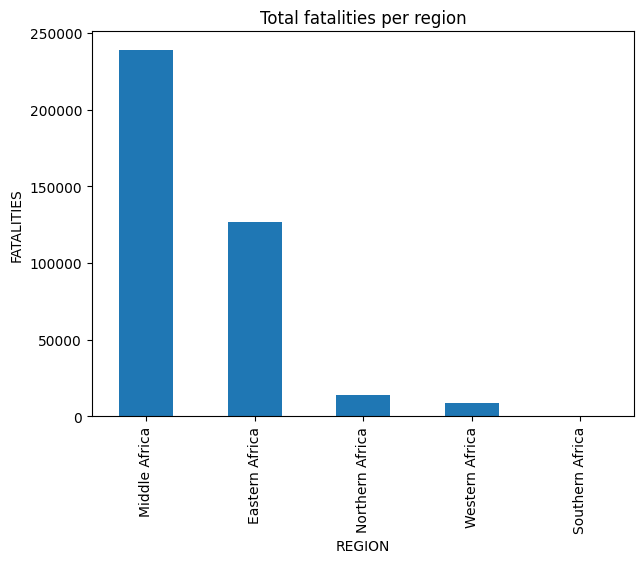

In [23]:
_, ax = plt.subplots(figsize=(7,5))
fatalities_per_region.plot(kind='bar', ax=ax, title='Total fatalities per region')
ax.set_ylabel('FATALITIES')
plt.show()

In [56]:
#Middle Africa and Eastern Africa have the highest number of fatalities by a lot as well as occurences. 
#Now I want to know how the fatalities are coupled with occurences.

region_analysis = pd.concat([fatalities_per_region, africa_conflict['REGION'].value_counts()], axis=1).reset_index()

In [58]:
region_analysis["FATALITY RATE"] = region_analysis["FATALITIES"]/region_analysis["REGION"]
region_analysis["FATALITY %"] = (region_analysis["FATALITIES"]/sum(region_analysis["FATALITIES"]))*100
region_analysis["CONFLICT %"] = (region_analysis["REGION"]/sum(region_analysis["REGION"]))*100
region_analysis.rename(columns = {"REGION":'CONFLICTS',"index":"REGION"}, inplace = True)
region_analysis

,REGION,FATALITIES,CONFLICTS,FATALITY RATE,FATALITY %,CONFLICT %
0,Middle Africa,239064,31632,7.557663,61.588877,58.341172
1,Eastern Africa,126929,13704,9.262186,32.700091,25.275273
2,Northern Africa,13690,4340,3.154378,3.526887,8.004574
3,Western Africa,8468,4504,1.880107,2.181569,8.307051
4,Southern Africa,10,39,0.256410,0.002576,0.071931


In [ ]:
#Eastern has the highest fatatilty rate followed by Middle Africa
#Eastern and Middle Africa are 90% of all the data

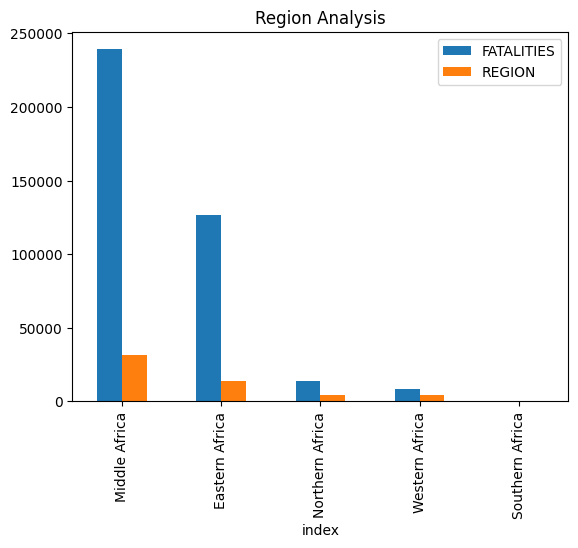

In [40]:
region_analysis.plot(kind='bar', x="index", y=["FATALITIES", "REGION"], title='Region Analysis')
ax.set_ylabel('FATALITIES AND COUNT')
plt.show()

In [27]:
#let's analyze the fatalities per country
fatalities_per_country = africa_conflict.groupby('COUNTRY')["FATALITIES"].agg('sum').sort_values(ascending=False)

In [28]:
fatalities_per_country

COUNTRY
Angola                          143816
Democratic Republic of Congo     62512
Eritrea                          54415
Ethiopia                         47816
Burundi                          23507
Central African Republic         14276
Algeria                          13690
Cameroon                          9161
Chad                              8581
Ivory Coast                       4129
Guinea                            3382
Kenya                             1103
Ghana                              652
Republic of Congo                  639
Benin                              158
Gambia                             147
Djibouti                            88
Equatorial Guinea                   43
Gabon                               36
Botswana                            10
Name: FATALITIES, dtype: int64

In [54]:
country_analysis = pd.concat([fatalities_per_country, africa_conflict['COUNTRY'].value_counts()], axis=1).reset_index()

In [55]:
country_analysis["RATE"] = country_analysis["FATALITIES"]/country_analysis["COUNTRY"]
country_analysis["FATALITY %"] = (country_analysis["FATALITIES"]/sum(country_analysis["FATALITIES"]))*100
country_analysis["CONFLICT %"] = (country_analysis["COUNTRY"]/sum(country_analysis["COUNTRY"]))*100
country_analysis.rename(columns = {"COUNTRY":'CONFLICTS',"index":"COUNTRY"}, inplace = True)
country_analysis

,COUNTRY,FATALITIES,CONFLICTS,RATE,FATALITY %,CONFLICT %
0,Angola,143816,3207,44.844403,37.050605,5.914901
1,Democratic Republic of Congo,62512,17866,3.498937,16.104658,32.951548
2,Eritrea,54415,404,134.690594,14.018668,0.745126
3,Ethiopia,47816,4422,10.813207,12.318600,8.155813
4,Burundi,23507,8502,2.764879,6.055992,15.680850
5,Central African Republic,14276,4926,2.898092,3.677855,9.085376
6,Algeria,13690,4340,3.154378,3.526887,8.004574
7,Cameroon,9161,3934,2.328673,2.360103,7.255759
8,Chad,8581,1058,8.110586,2.210681,1.951345
9,Ivory Coast,4129,1916,2.155010,1.063734,3.533817


In [ ]:
#Angola has 37% of all casualties (the highest by a huge margin) but only 6% of conflicts reported
#Followed by DRC which has  16% of all reported casualties.
#Eritea has the highest fatality rate by quite a margin as well as a high fatality count despite the very low number of conflicts
#DRC has the highest % of conflicts reported 33%

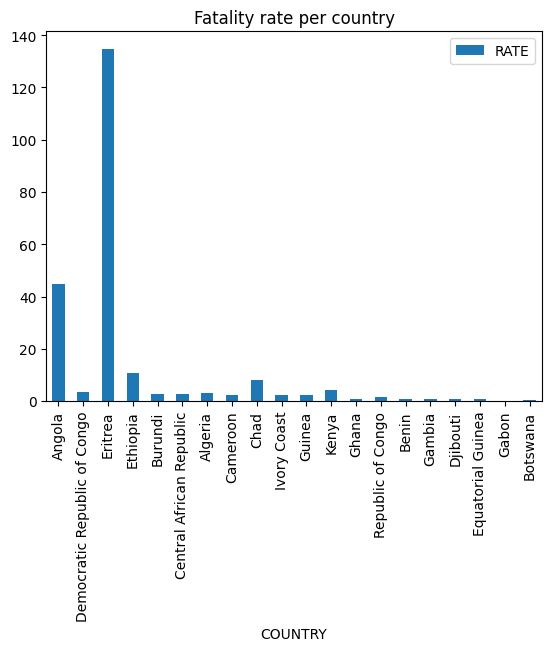

In [59]:
country_analysis.plot(kind='bar', x="COUNTRY", y="RATE", title='Fatality rate per country')
ax.set_ylabel('FATALITIES')
plt.show()

In [64]:
#Now I want to know how conflicts and fatalities have evolved over the years.
#For this we well compare the difference between the first year, 1997, and the last, 2020.
africa_conflict_1997 = africa_conflict[africa_conflict['YEAR'] == 1997]
#fatalities_per_country_1997 = .groupby('COUNTRY')["FATALITIES"].agg('sum').sort_values(ascending=False)
object_columns = [x for x in africa_conflict_1997.dtypes.index if africa_conflict_1997.dtypes[x]=='object']

object_columns = [x for x in object_columns if x not in ['NOTES','EVENT_DATE']]


#Print frequency of columns
for col in object_columns:
    print('\nFrequency of types for column %s'%col)
    print(africa_conflict_1997[col].value_counts())


Frequency of types for column EVENT_TYPE
Battles                       511
Violence against civilians    391
Strategic developments         82
Explosions/Remote violence     59
Riots                          56
Protests                       22
Name: EVENT_TYPE, dtype: int64

Frequency of types for column SUB_EVENT_TYPE
Armed clash                            408
Attack                                 382
Government regains territory            64
Remote explosive/landmine/IED           43
Non-state actor overtakes territory     39
Violent demonstration                   38
Looting/property destruction            27
Change to group/activity                24
Mob violence                            18
Non-violent transfer of territory       15
Protest with intervention               15
Shelling/artillery/missile attack       10
Headquarters or base established         7
Excessive force against protesters       7
Grenade                                  6
Abduction/forced disappearance  

In [65]:
africa_conflict_2020 = africa_conflict[africa_conflict['YEAR'] == 2020]
object_columns = [x for x in africa_conflict_2020.dtypes.index if africa_conflict_2020.dtypes[x]=='object']

object_columns = [x for x in object_columns if x not in ['NOTES','EVENT_DATE']]


#Print frequency of columns
for col in object_columns:
    print('\nFrequency of types for column %s'%col)
    print(africa_conflict_2020[col].value_counts())


Frequency of types for column EVENT_TYPE
Violence against civilians    2676
Battles                       2018
Riots                         1380
Strategic developments         801
Protests                       416
Explosions/Remote violence     107
Name: EVENT_TYPE, dtype: int64

Frequency of types for column SUB_EVENT_TYPE
Attack                                 2051
Armed clash                            1824
Violent demonstration                   782
Mob violence                            598
Abduction/forced disappearance          544
Looting/property destruction            471
Protest with intervention               355
Government regains territory            133
Arrests                                  86
Sexual violence                          82
Other                                    63
Non-state actor overtakes territory      61
Excessive force against protesters       61
Remote explosive/landmine/IED            55
Agreement                                52
Non-violent

In [ ]:
#In 1997, Angola followed by Burundi and the DRC were the leading nations in conflicts reported
#Middle and Eastern Africa were the leading regions in conflicts reported
#Brazzaville was the most reccurent location for conflicts
#Battles and Violence against civilians were the leading types of conflicts reported
#In 2020, on the other hand, the DRC and Cameroon were the leading nations in conflicts reported.
#Middle and Western Africa were the leading regions in conflicts reported
##Bamenda was the most reccurent location for conflicts due to the anglophone crisis

In [105]:
#I want to know the leading country, region, conflict type, sub type, administrative city, location, actors each year
years = list(range(1997,2021))
africa_conflict_analysis = pd.DataFrame()
mode_dict = {}
object_columns = [x for x in object_columns if x not in ['SOURCE','SOURCE_SCALE','ADMIN2']]

In [106]:
for year in years:
    conflict_year = africa_conflict[africa_conflict['YEAR'] == year]
    for col in object_columns:
        mode_dict[col] = conflict_year[col].mode()[0]
    mode_dict['YEAR'] = year
    africa_conflict_analysis = africa_conflict_analysis.append(mode_dict, ignore_index=True)
    mode_dict.clear()

C:\Users\nsigh\AppData\Local\Temp\ipykernel_644\3673839761.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  africa_conflict_analysis = africa_conflict_analysis.append(mode_dict, ignore_index=True)
C:\Users\nsigh\AppData\Local\Temp\ipykernel_644\3673839761.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  africa_conflict_analysis = africa_conflict_analysis.append(mode_dict, ignore_index=True)
C:\Users\nsigh\AppData\Local\Temp\ipykernel_644\3673839761.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  africa_conflict_analysis = africa_conflict_analysis.append(mode_dict, ignore_index=True)
C:\Users\nsigh\AppData\Local\Temp\ipykernel_644\3673839761.py:6: FutureWarning: The frame.append method is deprecated and will be rem

In [104]:
#This table gives the leading column value each year
africa_conflict_analysis

,EVENT_TYPE,SUB_EVENT_TYPE,ACTOR1,ACTOR2,REGION,COUNTRY,ADMIN1,LOCATION,YEAR
0,Battles,Armed clash,Military Forces of Angola (1975-),UNITA: National Union for the Total Independen...,Middle Africa,Angola,Lunda Norte,Brazzaville,1997
1,Battles,Armed clash,Military Forces of Angola (1975-),UNITA: National Union for the Total Independen...,Middle Africa,Angola,Bie,Kuito,1998
2,Battles,Armed clash,Military Forces of Angola (1975-),UNITA: National Union for the Total Independen...,Middle Africa,Angola,Malanje,Malanje,1999
3,Battles,Armed clash,Hutu Rebels,UNITA: National Union for the Total Independen...,Eastern Africa,Burundi,Bujumbura Rural,Lubalo,2000
4,Battles,Armed clash,Hutu Rebels,Civilians (Burundi),Middle Africa,Burundi,Bujumbura Rural,Tizi Ouzou,2001
5,Battles,Armed clash,Military Forces of Ethiopia (1995-2018),Civilians (Burundi),Eastern Africa,Burundi,Sud-Kivu,Bunia,2002
6,Battles,Armed clash,GSPC: Salafist Group for Call and Combat,Civilians (Burundi),Middle Africa,Democratic Republic of Congo,Ituri,Bunia,2003
7,Battles,Armed clash,Military Forces of Ethiopia (1995-2018),ONLF: Ogaden National Liberation Front,Middle Africa,Democratic Republic of Congo,Nord-Kivu,Abidjan,2004
8,Battles,Armed clash,Military Forces of the Democratic Republic of ...,Civilians (Democratic Republic of Congo),Middle Africa,Democratic Republic of Congo,Nord-Kivu,Bunia,2005
9,Battles,Armed clash,Military Forces of the Democratic Republic of ...,Civilians (Democratic Republic of Congo),Middle Africa,Democratic Republic of Congo,Nord-Kivu,Rutshuru,2006


In [108]:
#Now let's begin our time analysis. I want to know how reports and fatalities have evolved over 23 years
fatalities_per_year = africa_conflict.groupby('YEAR')["FATALITIES"].agg('sum').sort_values(ascending=False)

In [111]:
yearly_analysis = pd.concat([fatalities_per_year, africa_conflict['YEAR'].value_counts()], axis=1).reset_index()

In [114]:
yearly_analysis["FATALITY RATE"] = yearly_analysis["FATALITIES"]/yearly_analysis["YEAR"]
yearly_analysis["FATALITY %"] = (yearly_analysis["FATALITIES"]/sum(yearly_analysis["FATALITIES"]))*100
yearly_analysis["CONFLICT %"] = (yearly_analysis["YEAR"]/sum(yearly_analysis["YEAR"]))*100
yearly_analysis.rename(columns = {"YEAR":'CONFLICTS',"index":"YEAR"}, inplace = True)
yearly_analysis

,YEAR,FATALITIES,CONFLICTS,FATALITY RATE,FATALITY %,CONFLICT %
0,1999,155076,2537,61.125739,39.951463,4.679172
1,1998,60045,1356,44.280973,15.469097,2.500968
2,2001,18364,1757,10.451907,4.731027,3.240561
3,1997,16360,1121,14.594112,4.214746,2.067541
4,2002,15111,1627,9.287646,3.892972,3.000793
5,2000,14882,1768,8.417421,3.833976,3.260850
6,2020,12350,7398,1.669370,3.181669,13.644663
7,2009,8618,1311,6.573608,2.220213,2.417972
8,2018,8281,5295,1.563928,2.133393,9.765949
9,2017,8128,3525,2.305816,2.093976,6.501411


In [119]:
yearly_analysis.sort_values(by='YEAR',ascending = True)

,YEAR,FATALITIES,CONFLICTS,FATALITY RATE,FATALITY %,CONFLICT %
3,1997,16360,1121,14.594112,4.214746,2.067541
1,1998,60045,1356,44.280973,15.469097,2.500968
0,1999,155076,2537,61.125739,39.951463,4.679172
5,2000,14882,1768,8.417421,3.833976,3.260850
2,2001,18364,1757,10.451907,4.731027,3.240561
4,2002,15111,1627,9.287646,3.892972,3.000793
10,2003,7972,1110,7.181982,2.053787,2.047253
21,2004,3355,756,4.437831,0.864332,1.394345
19,2005,3804,721,5.276006,0.980006,1.329792
20,2006,3651,952,3.835084,0.940589,1.755842


In [127]:
yearly_analysis.sort_values(by='YEAR',ascending = True).describe()

,YEAR,FATALITIES,CONFLICTS,FATALITY RATE,FATALITY %,CONFLICT %
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,2009.000000,15526.440000,2168.760000,8.390502,4.000000,4.000000
std,7.359801,31252.784005,1708.122636,13.949456,8.051500,3.150413
min,1997.000000,228.000000,123.000000,1.447004,0.058739,0.226858
25%,2003.000000,3826.000000,1110.000000,1.879584,0.985673,2.047253
50%,2009.000000,6998.000000,1627.000000,4.023946,1.802860,3.000793
75%,2015.000000,12350.000000,2614.000000,7.181982,3.181669,4.821188
max,2021.000000,155076.000000,7398.000000,61.125739,39.951463,13.644663


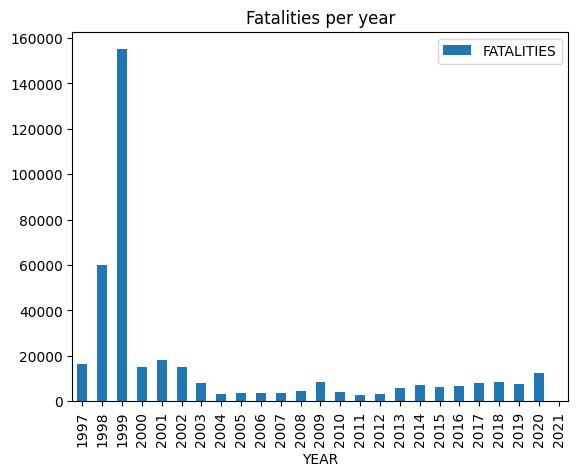

In [124]:
yearly_analysis.sort_values(by='YEAR',ascending = True).plot(kind='bar', x="YEAR", y="FATALITIES", title='Fatalities per year')
ax.set_ylabel('FATALITIES')
plt.show()

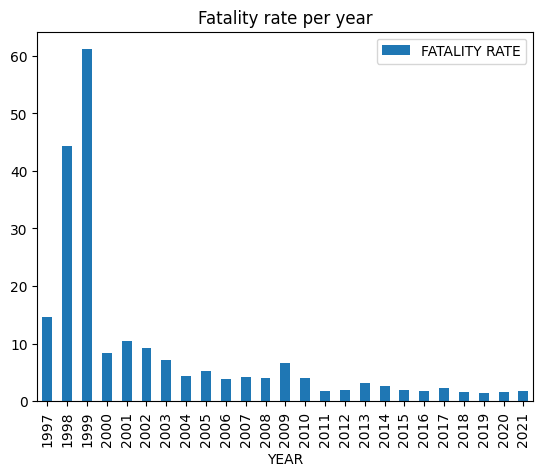

In [125]:
yearly_analysis.sort_values(by='YEAR',ascending = True).plot(kind='bar', x="YEAR", y="FATALITY RATE", title='Fatality rate per year')
ax.set_ylabel('FATALITIES')
plt.show()

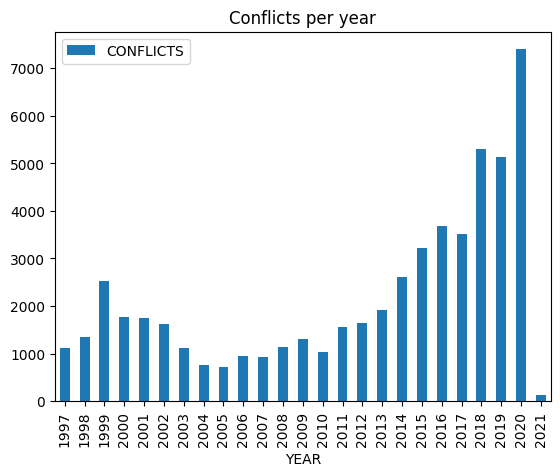

In [126]:
yearly_analysis.sort_values(by='YEAR',ascending = True).plot(kind='bar', x="YEAR", y="CONFLICTS", title='Conflicts per year')
ax.set_ylabel('CONFLICTS')
plt.show()

In [128]:
#1998 and 1999 have the fatality rate and count by a hugh margin. 1999 has 40% of all recorded fatalities and 1998 has 15%.
#Every other year is below 5%. There is  also fatality count between 
#In terms of conflict reported, 2020 had a spike in reported conflicts, there was a 4% increase from 2019,
#with close to 14% of all reported conflicts, it is the most reported. There has been an increase
#over the years since 2004 in conflicts reported, it can be attributed to better access for reports.  

In [129]:
#I want to take a quick dive in 1999 due to it's extremely high fatality count yet low conflict reported
africa_conflict_1999 = africa_conflict[africa_conflict['YEAR'] == 1999]

#Print frequency of columns
for col in object_columns:
    print('\nFrequency of types for column %s'%col)
    print(africa_conflict_1999[col].value_counts())


Frequency of types for column EVENT_TYPE
Battles                       1896
Violence against civilians     323
Strategic developments         129
Explosions/Remote violence     129
Riots                           35
Protests                        25
Name: EVENT_TYPE, dtype: int64

Frequency of types for column SUB_EVENT_TYPE
Armed clash                            1676
Attack                                  308
Government regains territory            147
Non-state actor overtakes territory      73
Shelling/artillery/missile attack        62
Non-violent transfer of territory        60
Remote explosive/landmine/IED            42
Change to group/activity                 35
Violent demonstration                    32
Air/drone strike                         19
Protest with intervention                19
Looting/property destruction             15
Abduction/forced disappearance           10
Agreement                                 9
Headquarters or base established          7
Grenade    

In [130]:
#The Angolan Civil war is responsible for the high fatality count and rate from 1997 to 1999

In [137]:
#Let's continue the time analysis but deeper i.e., daily, weekly, quarterly, monthly
time_fatalities = africa_conflict_1999.groupby('EVENT_DATE')['FATALITIES'].agg('sum')

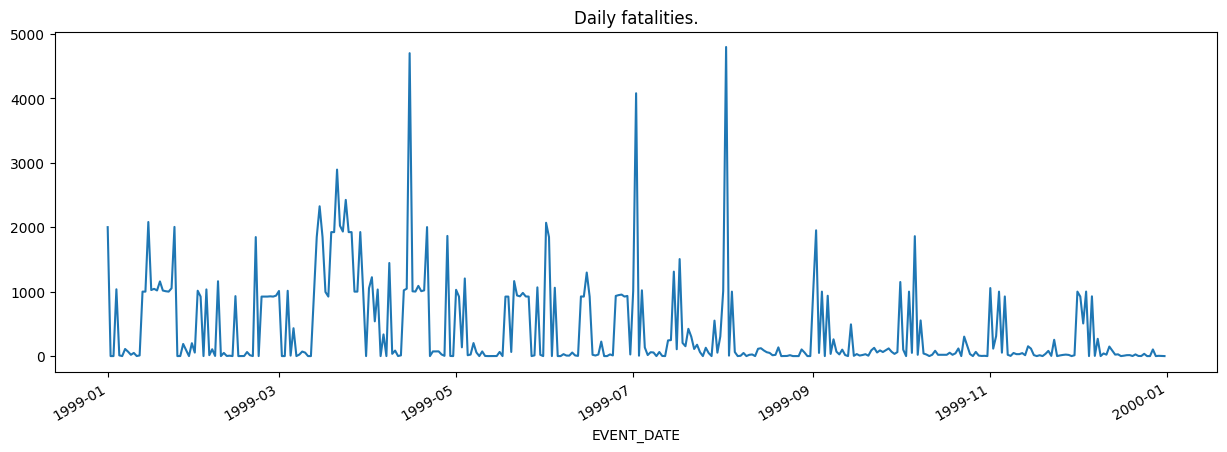

In [138]:
_, ax = plt.subplots(figsize=(15,5))
time_fatalities.plot(ax=ax)
ax.set_title('Daily fatalities.')
plt.show()

In [139]:
weekly_fatalities = time_fatalities.resample('W').sum()
monthly_fatalities = time_fatalities.resample('M', convention='end').sum()
Quart_fatalities = time_fatalities.resample('Q', convention='start').sum()

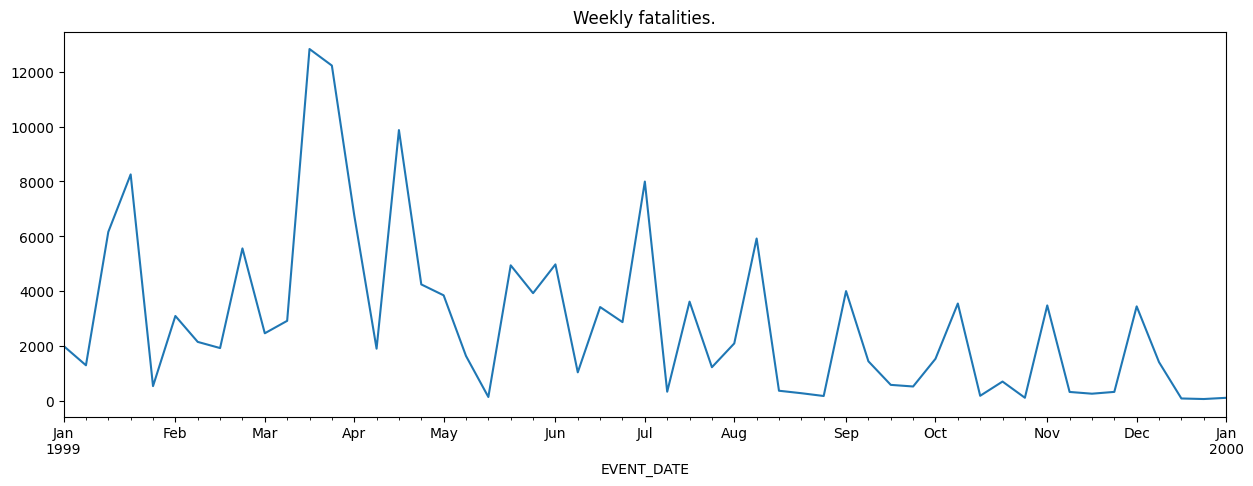

In [140]:
_, ax = plt.subplots(figsize=(15,5))
weekly_fatalities.plot(ax=ax)
ax.set_title('Weekly fatalities.')
plt.show()

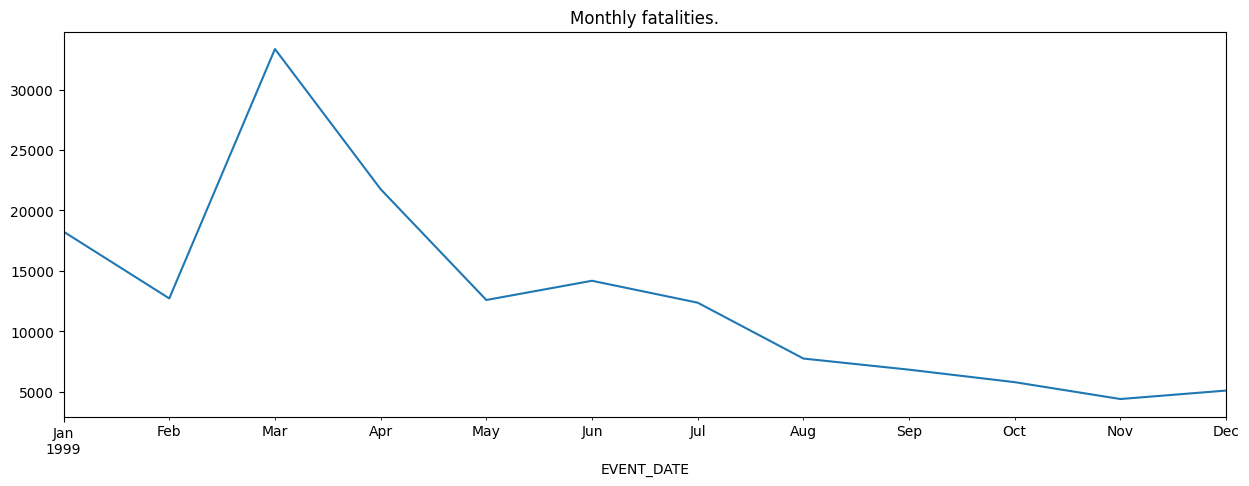

In [141]:
_, ax = plt.subplots(figsize=(15,5))
monthly_fatalities.plot(ax=ax)
ax.set_title('Monthly fatalities.')
plt.show()

In [18]:
africa_conflict.to_csv("Africa/Africa_conflict.csv", sep='\t', encoding='utf-8') 